<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [348]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import math
import seaborn as sns
from sklearn.dummy import DummyRegressor

In [287]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [288]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [289]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [291]:
#расчет метрики MAE для признака rougher.output.recovery
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

mean_absolute_error(data_train['rougher.output.recovery'], C*(F-T)/(F*(C-T))*100)

9.73512347450521e-15

**Вывод**

Также следует отметить, что данные в параметре rougher.output.recovery сосчитаны верно, так как средняя квадратичная ошибка составляет очень малую величину.

In [292]:
columns_train = list(pd.Series(data_train.columns))
columns_test = list(pd.Series(data_test.columns))
total_column = []

# составление списка столбцов, которые отсутсвуют в test, но присутствуют в train
for column in columns_train:
    if column in columns_test:
        total_column.append(column)
        print(column)

date
primary_cleaner.input.sulfate
primary_cleaner.input.depressant
primary_cleaner.input.feed_size
primary_cleaner.input.xanthate
primary_cleaner.state.floatbank8_a_air
primary_cleaner.state.floatbank8_a_level
primary_cleaner.state.floatbank8_b_air
primary_cleaner.state.floatbank8_b_level
primary_cleaner.state.floatbank8_c_air
primary_cleaner.state.floatbank8_c_level
primary_cleaner.state.floatbank8_d_air
primary_cleaner.state.floatbank8_d_level
rougher.input.feed_ag
rougher.input.feed_pb
rougher.input.feed_rate
rougher.input.feed_size
rougher.input.feed_sol
rougher.input.feed_au
rougher.input.floatbank10_sulfate
rougher.input.floatbank10_xanthate
rougher.input.floatbank11_sulfate
rougher.input.floatbank11_xanthate
rougher.state.floatbank10_a_air
rougher.state.floatbank10_a_level
rougher.state.floatbank10_b_air
rougher.state.floatbank10_b_level
rougher.state.floatbank10_c_air
rougher.state.floatbank10_c_level
rougher.state.floatbank10_d_air
rougher.state.floatbank10_d_level
rougher.st

In [293]:
data_train = data_train.ffill(axis=0)
data_test = data_test.ffill(axis=0)
data = data.ffill(axis=0)

In [294]:
data_train = data_train.drop_duplicates()
data_test = data_test.drop_duplicates()
data = data.drop_duplicates()

**Вывод**

По итогу предобработки данных были выполнены следующие операции:

1) Были проанализированы столбцы, которые отсутствуют в test, но присутствуют в train. Был сделан вывод о том, что эти данные еще не были получены в выборке test. Т.е. на момент составления датасета, еще не были известны выходные параметры. Так как в основном пропущены именно они. Также возможно они не замрялись, так как на выходе проводить замер каких-либо параметров является сложным и дорогостоящим;

2) Далее были заполнены пропуски во всех столбцах методом ffil, так как данные, которые являются соседними по времени, являются довольно схожими, поэтому является возможным заполнение пропусков таким методом;

3) Были удалены явные дубликаты.


Также следует отметить, что данные в параметре rougher.output.recovery сосчитаны верно, так как средняя квадратичная ошибка составляет очень малую величину.

## Анализ данных

**Анализ концентраций металлов**

In [295]:
columns_data = list(pd.Series(data.columns))
concentrate_columns = []

# отделение списка столбцов с концентрацией металлов
for elem in columns_data:
    if 'concentrate' in elem or 'rougher.input.feed_ag' in elem or 'rougher.input.feed_au' in elem or 'rougher.input.feed_pb' in elem:
        concentrate_columns.append(elem)

concentrate_data = data[concentrate_columns].copy()

# выделение концентраций золота
concentrate_au = []

for concentrate in concentrate_data.columns:
    if 'au' in concentrate:
        concentrate_au.append(concentrate)
concentrate_data_au = concentrate_data[concentrate_au]
concentrate_data_au = concentrate_data_au.drop(['rougher.calculation.sulfate_to_au_concentrate'], axis=1)

# выделение концентраций серебра
concentrate_ag = []

for concentrate in concentrate_data.columns:
    if 'ag' in concentrate:
        concentrate_ag.append(concentrate)
concentrate_data_ag = concentrate_data[concentrate_ag].copy()

# выделение концентраций свинца
concentrate_pb = []

for concentrate in concentrate_data.columns:
    if 'pb' in concentrate:
        concentrate_pb.append(concentrate)
concentrate_data_pb = concentrate_data[concentrate_pb].copy()

In [296]:
# функция по изменению концентрации со временем
def change(concentrate_data_me):
    for name, values in concentrate_data_me.iteritems():
        values.plot(label=name, style='o', alpha=0.1)
        plt.legend(bbox_to_anchor=(1,1), loc="upper left")

final.output.concentrate_au              44.076513
primary_cleaner.output.concentrate_au    32.119400
rougher.input.feed_au                     8.266097
rougher.output.concentrate_au            19.772000
dtype: float64

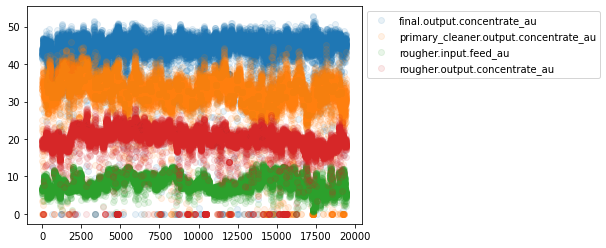

In [297]:
change(concentrate_data_au)
concentrate_data_au.mean()

final.output.concentrate_ag               5.168387
primary_cleaner.output.concentrate_ag     8.442408
rougher.input.feed_ag                     8.794927
rougher.output.concentrate_ag            11.994759
dtype: float64

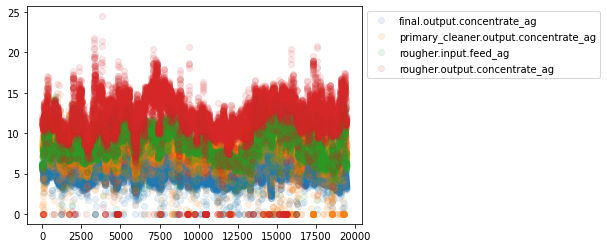

In [298]:
change(concentrate_data_ag)
concentrate_data_ag.mean()

final.output.concentrate_pb              9.978821
primary_cleaner.output.concentrate_pb    9.810317
rougher.input.feed_pb                    3.585096
rougher.output.concentrate_pb            7.606272
dtype: float64

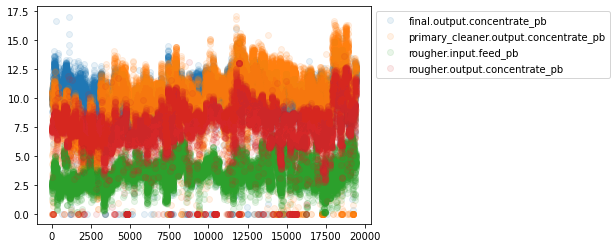

In [299]:
change(concentrate_data_pb)
concentrate_data_pb.mean()

**Вывод** 

Из анализа концентраций различных металлов после различных этапов очистки можно сделать следующий вывод:

1) Золото. На конечном этапе концентрация золота намного выше, чем на начальном. Также следует отметить тот факт, что после флотации концентрация золота уменьшилась.

2) Серебро. Здесь границы становятся более размытыми. Но в целом можно сделать вывод, что на финальном этапе концентрация сербра в руде значительно меньше;

3) Свинец. По свинцу сделать вывод сложно. Все границы являются размытыми, поэтому можно сделать вывод, что концентрация свинца меняется не сильно. Видно различие лишб на этапе флотации и первичной очистки, далее концентрация почти не изменяется.

**Анализ рамезров глобул**

In [300]:
# отделение списка столбцов с размером глобул 
columns_feed = list(pd.Series(data.columns))
feed_size_column =[]

for elem in columns_feed:
    if 'size' in elem:
        feed_size_column.append(elem)

display(feed_size_column)
# создание тестовой и тренировочной выборки с размером глобул
feed_data_train = data_train[feed_size_column].copy()
feed_data_test = data_test[feed_size_column].copy()

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

<AxesSubplot:>

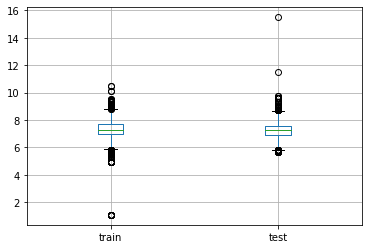

In [301]:
primary_cleaner = {"train": pd.Series(feed_data_train['primary_cleaner.input.feed_size'], index=feed_data_train.index),
                   "test": pd.Series(feed_data_test['primary_cleaner.input.feed_size'], index=feed_data_test.index)
                  }
primary_cleaner = pd.DataFrame(primary_cleaner)

primary_cleaner.boxplot()

<AxesSubplot:>

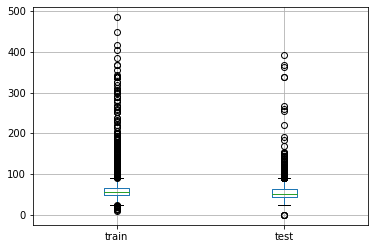

In [302]:
rougher = {"train": pd.Series(feed_data_train['rougher.input.feed_size'], index=feed_data_train.index),
                   "test": pd.Series(feed_data_test['rougher.input.feed_size'], index=feed_data_test.index)
                  }
rougher = pd.DataFrame(rougher)

rougher.boxplot()

**Вывод**

Итого, можно сделать вывод о том, что распределения по размеру глобул сырья в тестовой и тренировочной выборках отличаются не сильно.

**Анализ суммарной концентрации всех веществ**

In [303]:
# суммирование всех металлов 

cols_final = ['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol']
data['sum_final'] = data[cols_final].sum(axis=1)


cols_primary = ['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']
data['sum_primary_cleaner'] = data[cols_primary].sum(axis=1)

cols_rougher = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']
data['sum_rougher'] = data[cols_rougher].sum(axis=1)

cols_input = ['rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol']
data['sum_input'] = data[cols_input].sum(axis=1)

<AxesSubplot:>

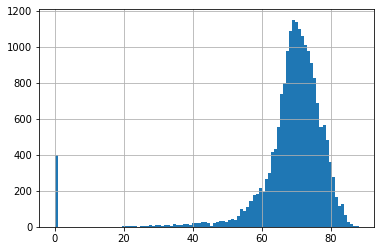

In [304]:
data['sum_rougher'].hist(bins=100)

<AxesSubplot:>

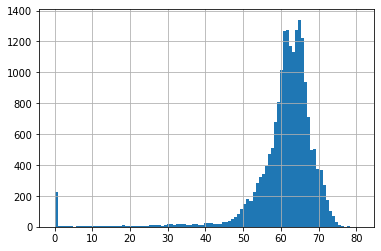

In [305]:
data['sum_primary_cleaner'].hist(bins=100)

<AxesSubplot:>

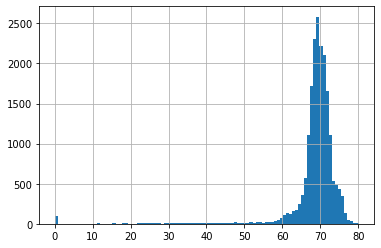

In [306]:
data['sum_final'].hist(bins=100)

<AxesSubplot:>

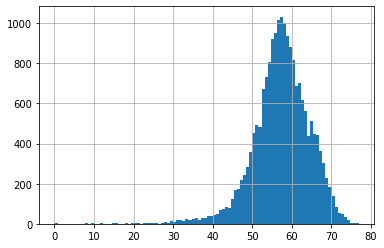

In [307]:
data['sum_input'].hist(bins=100)

In [308]:
for col in ['sum_input', 'sum_rougher', 'sum_final', 'sum_primary_cleaner']:
    data = data.loc[data[col] > 0]

In [309]:
data_train = data_train.set_index('date')
data_test = data_test.set_index('date')
data = data.set_index('date')

data_train = data_train.loc[data_train.index.isin(data.index)]
data_test = data_test.loc[data_test.index.isin(data.index)]

**Вывод**

Явно прослеживается увеличение концентрации метоаллов в руде с увеличением количества обаботок.

## Модель

***rougher.output.recovery***

**Выбор признаков**

In [310]:
# так как rougher это отдельный этап для него отберем обучающие признаки, связанные только с ним
columns_test = list(pd.Series(data_test.columns))
columns_rougher = []

for elem in columns_test:
    if 'rougher' in elem:
        columns_rougher.append(elem)

data_test_rougher = data_test[columns_rougher]
data_train_rougher = data_train[columns_rougher]

data_target = data['rougher.output.recovery']

data_train_rougher = data_train_rougher[data_test_rougher.columns]

**Разделение на целевой и обучающий признаки**

In [315]:
target_test_rougher = data_target.loc[data_target.index.isin(data_test_rougher.index)]
features_test_rougher = data_test_rougher

target_train_rougher = data_target.loc[data_target.index.isin(data_train_rougher.index)]
features_train_rougher = data_train_rougher

In [316]:
target_test_rougher = target_test_rougher.reset_index(drop=True)
features_test_rougher = features_test_rougher.reset_index(drop=True)
target_train_rougher = target_train_rougher.reset_index(drop=True)
features_train_rougher = features_train_rougher.reset_index(drop=True)

***final.output.recovery***

**Выбор признаков**

In [320]:
data_test_final = data_test.copy()
data_train_final = data_train.copy()

data_target = data['final.output.recovery']

data_train_final = data_train_final[data_test_final.columns]

**Разделение на целевой и обучающий признаки**

In [323]:
target_test_final = data_target.loc[data_target.index.isin(data_test_final.index)]
features_test_final = data_test_final

target_train_final = data_target.loc[data_target.index.isin(data_train_final.index)]
features_train_final = data_train_final

In [324]:
target_test_final = target_test_final.reset_index(drop=True)
features_test_final = features_test_final.reset_index(drop=True)
target_train_final = target_train_final.reset_index(drop=True)
features_train_final = features_train_final.reset_index(drop=True)

**Функция sMAPE**

In [326]:
def sMAPE_func(targ, pred):
    return(1/len(targ)*100*sum((abs(pred - targ) * 2 / (abs(pred) + abs(targ)))))

def sMAPE_func_final(rougher, final):
    return rougher*0.25 + final*0.75

**Обучеиние моделей**

**Линейная регрессия**

In [333]:
sample_size = int(len(target_train_rougher)/3)
sMAPE = []

for i in range(0, len(target_train_rougher), sample_size):
    valid_indexes = features_train_rougher.iloc[i: i + sample_size].index
    train_indexes = features_train_rougher.loc[features_train_rougher.index.isin(valid_indexes) == False].index
    model_reg = LinearRegression()
    
    # rougher
    features_train = features_train_rougher.loc[train_indexes]
    target_train = target_train_rougher.loc[train_indexes]
    
    features_valid = features_train_rougher.loc[valid_indexes]
    target_valid = target_train_rougher.loc[valid_indexes]
    
    model_reg = model_reg.fit(features_train, target_train)
    predict_valid = model_reg.predict(features_valid)
    
    sMAPE.append(sMAPE_func(target_valid, predict_valid))

sMAPE_r = sum(sMAPE)/len(sMAPE)
print(sum(sMAPE)/len(sMAPE))

9.008842290513728


In [336]:
sample_size = int(len(target_train_final)/3)
sMAPE = []

for i in range(0, len(target_train_final), sample_size):
    valid_indexes = target_train_final.iloc[i: i + sample_size].index
    train_indexes = target_train_final.loc[target_train_final.index.isin(valid_indexes) == False].index
    model_reg = LinearRegression()
    
    #final
    features_train = features_train_final.loc[train_indexes]
    target_train = target_train_final.loc[train_indexes]
    
    features_valid = features_train_final.loc[valid_indexes]
    target_valid = target_train_final.loc[valid_indexes]

    model_reg = model_reg.fit(features_train, target_train)
    predict_valid = model_reg.predict(features_valid)
    
    sMAPE.append(sMAPE_func(target_valid, predict_valid))

sMAPE_f = sum(sMAPE)/len(sMAPE)
print(sum(sMAPE)/len(sMAPE))

13.421883586284784


**Лес деревьев**

In [337]:
sample_size = int(len(target_train_rougher)/3)

best_sMAPE = 1000
best_est = 0
best_depth = 0

for est in range(30, 91, 10):
    for depth in range (7, 10):
        result = []
        for i in range(0, len(target_train_rougher), sample_size):
            valid_indexes = [k for k in range(i, i + sample_size)]
            train_indexes = [j for j in range(i)] + [j for j in range(i + sample_size, len(target_train_rougher))]
            model_forest = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
            
            # rougher
            features_train = features_train_rougher.loc[train_indexes]
            target_train = target_train_rougher.loc[train_indexes]

            features_valid = features_train_rougher.loc[valid_indexes]
            target_valid = target_train_rougher.loc[valid_indexes]

            model_forest = model_forest.fit(features_train, target_train)
            predict_valid = model_forest.predict(features_valid)

            result.append(sMAPE_func(target_valid, predict_valid))
        
        sMAPE =  sum(result) / len(result)
        
        # поиск наилучших гиперпараметров
        if sMAPE < best_sMAPE:
            best_sMAPE = sMAPE
            best_est = est
            best_depth = depth

best_sMAPE_r = best_sMAPE      
best_est_r = best_est
best_depth_r = best_depth
print(best_sMAPE_r)
print(best_est_r)
print(best_depth_r)

7.84115094952011
30
7


In [338]:
sample_size = int(len(target_train_final)/3)

best_sMAPE = 1000
best_est = 0
best_depth = 0

for est in range(30, 91, 10):
    for depth in range (7, 10):
        result = []
        for i in range(0, len(target_train_final), sample_size):
            valid_indexes = [k for k in range(i, i + sample_size)]
            train_indexes = [j for j in range(i)] + [j for j in range(i + sample_size, len(target_train_final))]
            model_forest = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
            
            #final
            features_train = features_train_final.loc[train_indexes]
            target_train = target_train_final.loc[train_indexes]

            features_valid = features_train_final.loc[valid_indexes]
            target_valid = target_train_final.loc[valid_indexes]

            model_forest = model_forest.fit(features_train, target_train)
            predict_valid = model_forest.predict(features_valid)

            result.append(sMAPE_func(target_valid, predict_valid))
        
        sMAPE =  sum(result) / len(result)
        
        # поиск наилучших гиперпараметров
        if sMAPE < best_sMAPE:
            best_sMAPE = sMAPE
            best_est = est
            best_depth = depth

best_sMAPE_f = best_sMAPE      
best_est_f = best_est
best_depth_f = best_depth
print(best_sMAPE_f)
print(best_est_f)
print(best_depth_f)

10.340952298753288
70
7


**Дерево решений**

In [345]:
sample_size = int(len(target_train_rougher)/3)

best_sMAPE = 1000
best_depth = 0

for depth in range (1, 15):
    result = []
    for i in range(0, len(target_train_rougher), sample_size):
        valid_indexes = [k for k in range(i, i + sample_size)]
        train_indexes = [j for j in range(i)] + [j for j in range(i + sample_size, len(target_train_rougher))]
        model_dec = DecisionTreeRegressor(random_state=12345, max_depth=depth)
            
        # rougher
        features_train = features_train_rougher.loc[train_indexes]
        target_train = target_train_rougher.loc[train_indexes]

        features_valid = features_train_rougher.loc[valid_indexes]
        target_valid = target_train_rougher.loc[valid_indexes]

        model_dec = model_dec.fit(features_train, target_train)
        predict_valid = model_dec.predict(features_valid)

        result.append(sMAPE_func(target_valid, predict_valid))
    
    sMAPE =  sum(result) / len(result)
    
    # поиск наилучших гиперпараметров
    if sMAPE < best_sMAPE:
        best_sMAPE = sMAPE
        best_depth = depth

best_sMAPE_r = best_sMAPE      
best_depth_r = best_depth
print(best_sMAPE_r)
print(best_depth_r)

7.97408811578078
2


In [346]:
sample_size = int(len(target_train_final)/3)

best_sMAPE = 1000
best_depth = 0

for depth in range (1, 15):
    result = []
    for i in range(0, len(target_train_final), sample_size):
        valid_indexes = [k for k in range(i, i + sample_size)]
        train_indexes = [j for j in range(i)] + [j for j in range(i + sample_size, len(target_train_final))]
        model_dec = DecisionTreeRegressor(random_state=12345, max_depth=depth)
            
        # final
        features_train = features_train_final.loc[train_indexes]
        target_train = target_train_final.loc[train_indexes]

        features_valid = features_train_final.loc[valid_indexes]
        target_valid = target_train_final.loc[valid_indexes]

        model_dec = model_dec.fit(features_train, target_train)
        predict_valid = model_dec.predict(features_valid)

        result.append(sMAPE_func(target_valid, predict_valid))
    
    sMAPE =  sum(result) / len(result)
    
    # поиск наилучших гиперпараметров
    if sMAPE < best_sMAPE:
        best_sMAPE = sMAPE
        best_depth = depth

best_sMAPE_f = best_sMAPE      
best_depth_f = best_depth
print(best_sMAPE_f)
print(best_depth_f)

10.289734998154735
1


**Вывод**

Итого, по параметру rougher.output.recovery можно сделать вывод о том, что наилучшей является модель обучающего леса деревьев с максимальным количеством деревьев 30 и глубиной 7. Погрешность составляет 7,84%.

Итого, по параметру final.output.recovery можно сделать вывод о том, что наилучшей является модель обучающего дерева с максимальной глубиной 1. Погрешность составляет 10,3%.

**Проверка тестовой выборки**

In [352]:
model_forest = RandomForestRegressor(random_state=12345, n_estimators=30, max_depth=7)

model_forest = model_forest.fit(features_train_rougher, target_train_rougher)
predict_test = model_forest.predict(features_test_rougher)

sMAPE_func_r = sMAPE_func(target_test_rougher, predict_test)

In [353]:
model_dec = DecisionTreeRegressor(random_state=12345, max_depth=1)

model_dec = model_dec.fit(features_train_final, target_train_final)
predict_test = model_dec.predict(features_test_final)

sMAPE_func_f = sMAPE_func(target_test_final, predict_test)

In [354]:
print(sMAPE_func_final(sMAPE_func_r, sMAPE_func_f))

7.198994887216875


In [360]:
dummy_regr = DummyRegressor(strategy="mean")

dummy_regr.fit(features_train_rougher, target_train_final)
dummy_pred = dummy_regr.predict(features_test_rougher)
sMAPE_rougher = sMAPE_func(target_test_rougher, dummy_pred)

dummy_regr.fit(features_train_final, target_train_final)
dummy_pred = dummy_regr.predict(features_test_final)
sMAPE_final = sMAPE_func(target_test_final, dummy_pred)

print(sMAPE_func_final(sMAPE_rougher, sMAPE_final))

12.946035803347957


**Вывод**

Была обучена модель для предсказания двух целевых признаков. Итоговое sMAPE по данным моделям составляем 7,19%. При этом sMAPE константной модели составляет 13%.

Итого, применение машинного обучения в данной отрасли не явлется рекомендованным, так как значение предсказанное значение отличается от константного всего лишь на 6%.